
# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

>Since I'm a huge movie enthusiest, I chose the TMDb movie data set for my project. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

***Questions***
 - What are movie revenues from year to year?
 - How many movies are released from year to year?
 - What is the percentage growth rate for movies released from 1960 to 2015?
 - What are the top producing movies?
 - Which genres are most popular from year to year? 
 - What kinds of properties are associated with movies that have high revenues?
 - Which directors have produced the most movies from year to year?
 - Which directors have been the most successful in regards to revenue?
 - Are movies with larger budgets more successful?
  
***Note***
 - Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
 - There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
 - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
# Import statements for all of the packages that I will be using

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Loading the csv movie data file into data frame. 
df = pd.read_csv('tmdb-movies.csv')

# Display first five rows of data
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Data Cleaning - Overview

>Review data set for the following house cleanning items:

<ul>
<li><a href="#step_1">View data set dimensions</a></li>
<li><a href="#step_2">Determine which columns will be included in my movie review analysis and drop any unnecessary columns</a></li>
<li><a href="#step_3">Determine if there are any duplicates</a></li>
<li><a href="#step_4">Determine missing data (zero and null values)</a></li>
<li><a href="#step_5">Review data types and convert to correct formats</a></li>
<li><a href="#step_6">Remove pipe (|) character from columns that contain multiple characters</a></li>
<li><a href="#step_7">Create a function to retrieve the maxium record from a column</a></li>
<li><a href="#step_8">Create a function to retrieve the top 5 records with the highest values from a column</a></li>    
</ul>

<a id='step_1'></a>
### <font color=blue>Step 1. View data set dimensions</font>
>View dimensions in dataset to determine number of columns and rows. 

>The original data set contains 10,866 rows and 21 columns.

In [3]:
# View dimensions in dataset to determine number of columns and rows 
df.shape

(10866, 21)

<a id='step_2'></a>
### <font color=blue>Step 2. Determine which columns will be included in the data analysis and drop any unnecessary columns</font>
>The following columns were dropped since they will not be used in my analysis:
 - imdb_id, homepage, tagline, overview, keywords, vote_count, vote_average, budget_adj, revenue_adj, production_companies

In [4]:
# Drop columns not used in the dataset
df.drop(['imdb_id','homepage', 'tagline', 'overview', 'keywords', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj', 'production_companies'], axis=1, inplace = True)

In [5]:
# Confirm columns were removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 933.9+ KB


<a id='step_3'></a>
### <font color=blue>Step 3. Determine if there are any duplicates in the data set</font>
>Check for any duplicates and remove them from the dataset.

>Duplicate review revealed there was only one duplicate in the data set that needs to be removed.

In [6]:
# Check for duplicate rows in data set
sum(df.duplicated())

1

In [7]:
# Dropping duplicate in dataset and keeping first one
df.drop_duplicates(keep = 'first', inplace=True)

In [8]:
# Confirm duplicate has been removed from dataset. Should be 0
sum(df.duplicated())

0

In [9]:
# Confirm duplicate was removed by noting row count went from 10866 to 10865
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 1018.6+ KB


<a id='step_4'></a>
### <font color=blue>Step 4. Determine missing data (zero and null values)</font>

> First, lets determine which columns had missing data by running info(). 


In [10]:
# Check which columns have missing values with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 1018.6+ KB


>Per the above details, we can see that the following columns have missing data since their numbers are less than 10,865: 
- cast
- director
- genres

>Next, lets display which rows have missing values to get an idea of what the missing data looks like. We can see there are zero and NaN values present in the data set.


In [11]:
# Display rows with missing data
df[df.isnull().any(axis=1)].head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,2015
424,363869,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,2015


>Let's break down the missing value counts to determine how many consist of zeros and/or NaN values.

>First, let's count the number of missing values equal to zero.

In [12]:
# Count the number of missing values in each column that has a minimum value of zero
(df == 0).sum()

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
cast                 0
director             0
runtime             31
genres               0
release_date         0
release_year         0
dtype: int64

>Based on my review, the following columns contained zero values:
 - budget: 5,696
 - revenue: 6,016
 - runtime: 31
 
>We can see above that runtime has a lot fewer zeros compared to the budget and revenue columns, which both
show a lot more zeros over half of the rows in the dataset. Since runtime's count of 31 zeros makes up a small percentage of the overall data set, zeros will be refilled with the runtime mean. 

>For the budget and revenue columns, we will convert the zero values to NaNs.  By converting to NaN, it will be easier to distinguish and remove the zero values.

In [13]:
# Imput runtime by refilling zeros with runtime's mean
# Use pandas function replace to fill zero values with the mean
df['runtime'] = df['runtime'].replace(0, np.mean)

In [14]:
# Confirm zeros have been replaced with mean
df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year


In [15]:
# Mark zero values in columns budget and revenue as NaN.  By converting to NaN, it will be easier to distinguish
# and remove the zero values.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

# Count number of NaN values in each column. Budget and revenue should show up as NaN values now.
df.isnull().sum()

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
director            44
runtime              0
genres              23
release_date         0
release_year         0
dtype: int64

>Now lets take a look at our NaN value analysis and see which columns contain them.

>The following columns below contain NaN values:
 - revenue: 5696
 - budget: 6016
 - cast: 76
 - directors: 44
 - genres: 23
 
 >For analysis purposes, the NaN values will be removed from the dataset since the above fields need values in order to be useful. 

In [16]:
# Drop rows with any null values in dataset
df.dropna(how='any', inplace=True)

In [17]:
# Check and confirm if any null values still exist in dataset, should show false
df.isnull().sum().any()

False

<a id='step_5'></a>
### <font color=blue>Step 5. Review data types and convert to correct formats</font>

> Lets review data types by running dtypes. From this, we can see that the following adjustments need to be made:
- budget and revenue columns need to be converted to int data types
- release year needs to be convert to date time.

In [18]:
# Check datatypes 
df.dtypes

id                  int64
popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
runtime            object
genres             object
release_date       object
release_year        int64
dtype: object

In [19]:
# Converting the budget and revenue datatypes from float to int
col_type = ['budget', 'revenue']
df[col_type] = df[col_type].applymap(np.int64)

In [20]:
# Confirm data types were updated to int
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime            object
genres             object
release_date       object
release_year        int64
dtype: object

>Next, lets convert 'release_date' to correct data type. It should be represented as a date time object with the format (yyyy-mm-dd)

In [21]:
# Convert release_date column to correct data type of datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [22]:
# Confirm date was converted correctly
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [23]:
# Confirm release_date is showing the correct datatype of timestamp
type(df['release_date'][0])

pandas._libs.tslib.Timestamp

<a id='step_6'></a>
### <font color=blue>Step 6. Create a function to remove pipe (|) character from columns that contain multiple characters</font>


In [24]:
# Create a function to remove pipe (|) character from columns that contain multiple characters and returns a count
def split_data(column):
    #will take a column, and separate the string by '|'
    split_data = df[column].str.cat(sep = '|')
    
    # Assigning a pandas series and storing values in the split_data variable
    split_data = pd.Series(split_data.split('|'))
    
    # Ordering count values in descending order
    count = split_data.value_counts(ascending = False)
    
    return count

<a id='step_7'></a>
### <font color=blue>Step 7. Create a function to retrieve the maxium record from a column</font>

In [25]:
# Create a function to retrieve the maxium record from a column
def get_max_record(column):
    max = df[column].idxmax()
    max_record = pd.DataFrame(df.loc[max])
    
    return max_record

<a id='step_8'></a>
### <font color=blue>Step 8. Create a function to retrieve the top 5 records with the highest values from a column</font>

In [26]:
# Create a function to retrieve the top 5 records with the highest values from a column
def get_top_records(column):
    top_records = df.sort_values([column], ascending=[False])
    top_record_values = pd.DataFrame(top_records).head()
          
    return top_record_values

<a id='eda'></a>
## Exploratory Data Analysis


 1. What are movie revenues from year to year?
 2. How many movies are released from year to year?
 3. What is the percentage growth rate for movies released from 1960 to 2015?
 4. What is the relationship between revenues and budgets from year to year?
 5. Which years have the largest variances from 1960 to 2015?
 6. Which movies had the largest variances from 1960 to 2015?
 7. What were the number of movies produced by genre type?
 8. Which genres generated the highest revenues?
 9. What were the most successful movies from 1960 to 2015?
 10. Which directors produced the most movies from year to year?
 11. What directors generated the highest revenues?
 12. Which movies had the highest popularity rankings?
 13. Which actors appeared in the most movies?

### Research Question 1 - What are movie revenues from year to year?

> First, lets determine total movie revenues generated per release year.

In [27]:
# Create a function to retrieve the top 5 years with with the highest sum values from a column
def get_top_yearly_records(column1,column2):
    top_yearly = df.groupby([column1])[column2].sum()
    top_yearly_values = top_yearly.sort_values(ascending=False).head()
    
    return top_yearly_values


In [28]:
# Calculate total movie revenues generated per release year by using the get_top_yearly_records function
get_top_yearly_records('release_year', 'revenue')

release_year
2015    26202922801
2013    24350666103
2012    24151056032
2014    24069969357
2011    23408245247
Name: revenue, dtype: int64

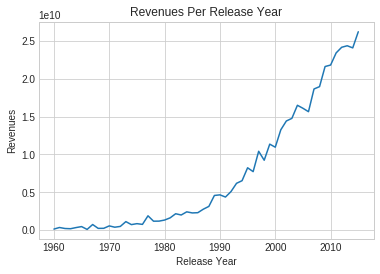

In [29]:
# Plotting revenues per release year
yearly_revenue = df.groupby(['release_year'])['revenue'].sum()
yearly_revenue.sort_values(ascending=False)

plt.style.use('seaborn-whitegrid')

# Create figure and axis
fig = plt.figure()
ax = plt.axes()

plt.plot(yearly_revenue)
plt.title("Revenues Per Release Year")
plt.xlabel("Release Year")
plt.ylabel("Revenues");

> Based on the above line graph, there has been an upward revenue trend over the years.

>Next, lets take a look at the number of movies produced each year compared to revenues to help us understand the relationship between the two variables. 

### Research Question 2 - How many movies are released from year to year?

>Based on the number of movies released from year to year, let's review the top ten years, to determine which years produced the most movies and plot a line graph to help us visualize the results.

In [30]:
# How many movies are produced per year
yearly_qty = df.groupby(['release_year'])['original_title'].count()

# Create a variable called top_year to show which years produced the most movies
top_year = yearly_qty.sort_values(ascending=False).head(10)
top_year

release_year
2011    199
2013    180
2010    178
2009    174
2006    169
2008    166
2014    165
2007    164
2005    163
2015    160
Name: original_title, dtype: int64

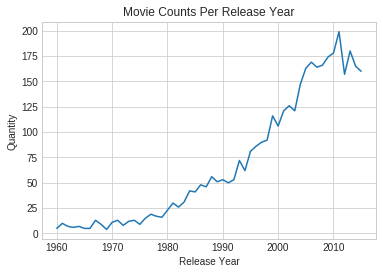

In [31]:
# Plotting count of movies produced per release year
plt.style.use('seaborn-whitegrid')

# Create figure and axis
fig = plt.figure()
ax = plt.axes()

plt.plot(yearly_qty)
plt.title("Movie Counts Per Release Year")
plt.xlabel("Release Year")
plt.ylabel("Quantity");

>From our analysis above, we can see that the number of movies produced are increasing from year to year with 2011 having the highest peak producing 196 movies that year. However, there were some noticeable troughs especially in 2013 when movies decreased to a count of 179. 

>Next, let's calculate the pecentage growth rate to help us determine the rate at which movies releases are growing from year to year based on our date range (1960 to 2015). 

### Research Question 3 - What is the percentage growth rate for movies released from 1960 to 2015? 

>Here we will calculate the percentage growth rate for movie releases from 1960 to 2015 and plot the results to get a visualization.

In [32]:
# Calculate percentage growth for number of movies produced per year and show in percentages for years 1960 to 2015
growth_rate = yearly_qty / yearly_qty.iloc[0] * 100

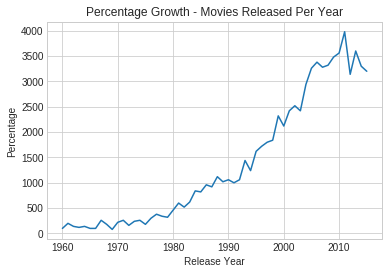

In [33]:
# Plot percentage growth of movies produced each year
plt.style.use('seaborn-whitegrid')

# Create figure and axis
fig = plt.figure()
ax = plt.axes()

plt.plot(growth_rate)

plt.title("Percentage Growth - Movies Released Per Year")
plt.xlabel("Release Year")
plt.ylabel("Percentage");

plt.show()

> Based on the total number of movies produced each year, I noted that movie production has increased significantly from only five movies released in 1960 compared to 160 in 2015.  Per my analysis, the increase in the number of movies produced each year appears to be driving revenues since more movies equals more revenue potential. The graph above shows a positive correlation. We can see that the percentage growth of movie releases has increased from a humble starting point of 100 % in 1960 all the way to 3,200 % by 2015. This huge growth rate leads us to an important question of why? What is causing the growth in movie production to increase over the years? 

>Research shows that technology advances in film production, are allowing the film industry to produce more movies than ever that were not previously possible. In addition, advances in cameras, visual effects, and audio are enabling the production of higher resolution/better quality films. Also, the ability to go digital versus using costly film has significantly reduced movie production costs. Shooting in digital allows producers to do more in less time at a much lower cost. All of these factors contribute to the ability to produce more movies each year, resulting in the potential for more revenue growth year to year.

### Research Question 4 - What is the relationship between revenues and budgets from year to year

> First step, lets determine which years had the largest revenues and budgets. Since, we do not have actual cost data, for our analysis, we'll compare budgets to revenues and look at the variances between the two variables. 

In [34]:
# Calculating years with the highest revenues by calling on the get_top_yearly_records function
get_top_yearly_records('release_year', 'revenue')

release_year
2015    26202922801
2013    24350666103
2012    24151056032
2014    24069969357
2011    23408245247
Name: revenue, dtype: int64

In [35]:
# Calculating years with the highest budgets by calling on the get_top_yearly_records function
get_top_yearly_records('release_year', 'budget')

release_year
2013    8567922778
2010    8463138439
2011    8441550543
2012    7585110525
2009    7537827919
Name: budget, dtype: int64

In [36]:
# Calculating years with the highest revenues and budgets for plotting
rev_sum = df.groupby(['release_year']).sum().revenue
budget_sum = df.groupby(['release_year']).sum().budget

# Creating indexes for plotting
rev_year = rev_sum.index
budget_year = budget_sum.index

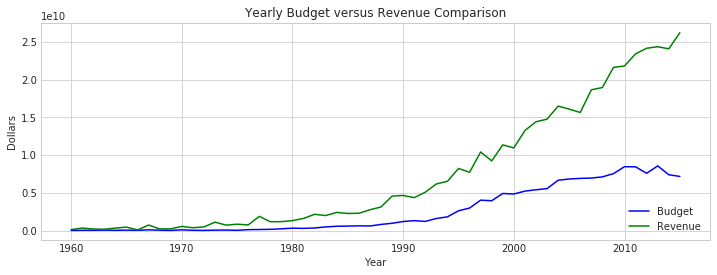

In [37]:
# Plotting yearly budget versus revenue
sns.set_style('whitegrid')
x1, y1 = budget_year, budget_sum
x2, y2 = rev_year, rev_sum

plt.figure(figsize=(12,4))
plt.plot(x1, y1, color = 'b', label='Budget')
plt.plot(x2, y2, color = 'g', label='Revenue')
plt.title('Yearly Budget versus Revenue Comparison')
plt.xlabel('Year')
plt.ylabel('Dollars');
plt.legend(loc='lower right')
plt.show()

> Looking at the line chart above, you can see that both revenues and budgets are showing a positive correlation. You'll also notice that the gap between the two variables is increasing from year to year. Next, lets take a deeper dive into this growing gap by adding a variance column to the dataset to see which years had the largest variances and invesigate any outliers.

### Research Question 5 - Which years have the largest variances from 1960 to 2015?

In [38]:
# Add a variance column that calculates the difference between revenue and budget
# Adding new column between revenue and original_title columns
df.insert(4, 'variance', df['revenue'] - df['budget'])

In [39]:
# Calculate years with the largest variances by calling on the get_top_yearly_records function
get_top_yearly_records('release_year', 'variance')

release_year
2015    19032145273
2014    16676201357
2012    16565945507
2013    15782743325
2011    14966694704
Name: variance, dtype: int64

In [40]:
# Show statistics for variances
df['variance'].describe()

count    3.849000e+03
mean     7.056595e+07
std      1.506990e+08
min     -4.139124e+08
25%     -1.312284e+06
50%      2.014450e+07
75%      8.198066e+07
max      2.544506e+09
Name: variance, dtype: float64

>The above statistics for the variance column is showing a maximum variance of 2.54 billion. Let's investigate and see which movies had the largest variances.

### Research Question 6 - Which movies had the largest variances from 1960 to 2015?
>Based on the above statistics, let use the get_max_record function to see which movie is tied to max variance (2.54 billion).

In [41]:
# Call on get_max_record function to show the movie with the largest variance (revenue minus budget)
get_max_record('variance')

,1386
id,19995
popularity,9.43277
budget,237000000
revenue,2781505847
variance,2544505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction


>The results list Avatar as the movie with the largest maximum variance. It's not surprising since Avatar is considered one of the highest grossing films of all time, generating total revenues of 2.54 Billion.

>Next, let's plot the variances to get a visual overview and investigate any outliers.

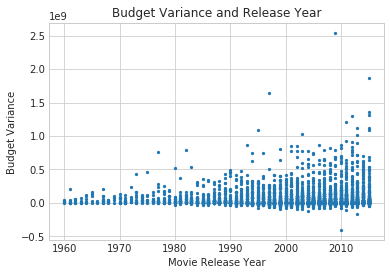

In [42]:
# Plot release year per variances
plt.scatter(df.release_year, df.variance, 5)
plt.title('Budget Variance and Release Year')
plt.xlabel('Movie Release Year')
plt.ylabel('Budget Variance')
plt.show()

>In the scatterplot above, four outliers were noted that showed significant variances between revenues and budgets.  Three were favorable with variances over 1.5 billion and one was unfavorable with a negative variance of -4.13 million. Let's review and get the movie details by filtering on variances greater than 1.5 billion and less than -4.13 million.

In [43]:
# Show details on the three favorable outlier variances greater than 1.5 billion
df[df.variance > 1500000000]

,id,popularity,budget,revenue,variance,original_title,cast,director,runtime,genres,release_date,release_year
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
1386,19995,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009
5231,597,4.355219,200000000,1845034188,1645034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,1997


In [44]:
# Show details on the negative outlier variance less than or equal to -4.13 million
df[df.variance <= -413912400]

,id,popularity,budget,revenue,variance,original_title,cast,director,runtime,genres,release_date,release_year
2244,46528,0.25054,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,2010


>The three favorable outlier variances noted earlier were reference to the movies Star Wars, Avatar, and Titanic. The unfavorable variance was reference to the movie, The Warrior's Way. For the three favorable variances, I noted that James Cameron was the director for 2 of the movies, Avatar and Titanic, which were both very successful movies and were classified under the primary genres action and drama.

>Now, let's look at the top 5 movies with the largest variances.

In [45]:
# Call on the get_top_records function to display top 5 movies with the largest variances
get_top_records('variance')

,id,popularity,budget,revenue,variance,original_title,cast,director,runtime,genres,release_date,release_year
1386,19995,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5231,597,4.355219,200000000,1845034188,1645034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,1997
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


> Per our earlier analysis, 2015 had the largest variance (19 billion) compared to the other years. But if you look at variances by movie detail, you can see that the top five movies with the largest variances (Avatar, Star Wars, Titanic, Jurassic World, and Furious 7) all came from different release years (2009, 2015, and 1997). I noted that top five movies with the largest variances were produced by some of the most well known and respected directors in the film industry. All having a history of always generating blockbusters. Also, if you look at the movie cast, you can see it includes a large array of famous actors. In my opinion, this could definitely influence revenue generation due their star power and huge fan base following.

> Lets perform additional analysis to see which factors could be contributing to the large variances between revenue and budget.
> For example, is there a correlation between director, genre, cast, or popularity that is helping to drive revenues and movie success.

### Research Question  7 - What were the number of movies produced by genre type?

>First, we need to obtain a listing of genres. Since some of the rows in the genre column contain multiple values, we will need to split the strings to determine the unique genre categories.

In [46]:
# Determine which strings contain multiple values in the genres column
df_genres = df[df['genres'].str.contains('|')]
df_genres.head(1)

,id,popularity,budget,revenue,variance,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


>Based on my analysis of the genres column, the dataset contains 3805 rows, the genre column contains multiple values within the string.
Next, we will take each genre row and split the multiple values into strings and keep the first value since the first value seems to be the primary genre type for the movie. In my opinion, including the other multiple values would skew the results causing the primary genre classification to be overshadowed.

In [47]:
# Take each genre row and split the multiple values into strings and keep the first value.
df['genres_split'] = df.genres.str.split('|').str[0]

#Determine the number unique genre string values
df.nunique().genres_split

19

In [48]:
# Determine the number of movies produced by genre
df_genre = df.groupby(['genres_split']).original_title.count()

In [49]:
# Sort to determine the 10 top genres produced for movies
top_genre = df_genre.sort_values(ascending=False).head(10)
top_genre.head(10)

genres_split
Drama              889
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Name: original_title, dtype: int64

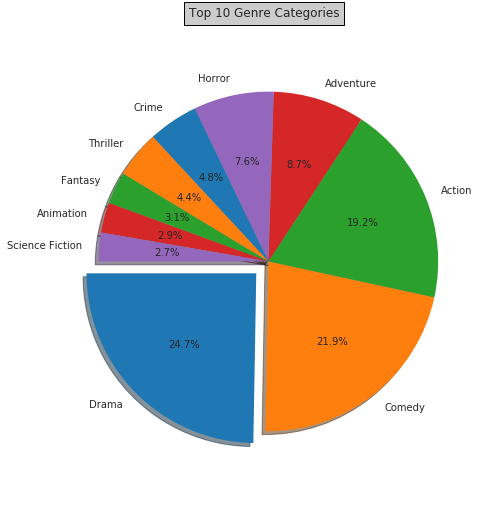

In [50]:
# Plotting the top 10 genre categories
genre_percentage = top_genre
genre_name = ['Drama', 'Comedy', 'Action', 'Adventure', 'Horror','Crime','Thriller', 'Fantasy', 'Animation','Science Fiction']

plt.subplots(figsize=(7, 9))

# Colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd","#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Explode 1st slice
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  

# Plot
plt.pie(genre_percentage, explode=explode, labels=genre_name, colors=colors,        
autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Top 10 Genre Categories", bbox={'facecolor':'0.8', 'pad':5})
plt.axis("equal")
plt.show();

>Based on the above analysis, there were 19 genre categories in total. From this list, I narrowed down my analysis to the top 10 genres with the highest movie counts. Looking at the pie chart above, you can visually see that Drama, Comedy, and Action counts were the most popular genres. This leads me to the question of why do directors/production companies gravitate towards these genres? Is is correlated with the potentail revenue streams that could be produced? Do these type of genres have the highest revenue producing movies?

>Let's look at which genres produced the most revenues per year to get a better picture.

### Research Question 8 - Which genres generated the highest revenues?

In [51]:
# Determine revenues generated per year by genre
df_genre_rev = df.groupby(['genres_split']).sum().revenue

# Sorting to determine highest revenues per genre
top_rev_genre = df_genre_rev.sort_values(ascending=False)

# Top 10 revenue producing genres
top_rev_genre[:10]

genres_split
Action             93654873325
Adventure          71852343861
Comedy             62011581729
Drama              57627537910
Animation          28441594648
Fantasy            17555295357
Science Fiction    17038789305
Horror             15145576899
Thriller           12609056746
Crime              12206416011
Name: revenue, dtype: int64

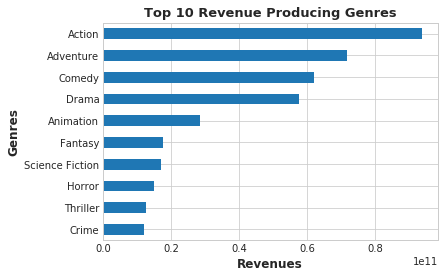

In [52]:
# Plotting the top 10 revenue producing genres
top_rev_genre.sort_values(ascending=True)[9:].plot(kind='barh', rot=0)

plt.title('Top 10 Revenue Producing Genres', fontsize = '13', fontweight = 'bold')
plt.xlabel('Revenues', fontsize = '12', fontweight = 'bold')
plt.ylabel('Genres', fontsize = '12', fontweight = 'bold')
plt.show();

In [53]:
# Top 10 lowest revenue producing genres
bottom_rev_genre = df_genre_rev.sort_values(ascending=True).head(10)
bottom_rev_genre

genres_split
TV Movie          42000000
Documentary      652807270
Western         1279386506
History         1931446332
Music           2245221642
Mystery         2596258933
War             2669712504
Romance         6717823300
Family          8701487612
Crime          12206416011
Name: revenue, dtype: int64

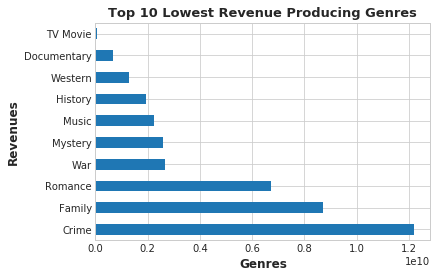

In [54]:
# Plotting 10 lowest revenue producing genres
bottom_rev_genre.sort_values(ascending=False).plot(kind='barh', rot=0)

plt.title('Top 10 Lowest Revenue Producing Genres', fontsize = '13', fontweight = 'bold')
plt.xlabel('Genres', fontsize = '12', fontweight = 'bold')
plt.ylabel('Revenues', fontsize = '12', fontweight = 'bold')
plt.show();

>Based on the revenue analysis per genre for the years 1960 to 2015, the top 5 revenue producing genres were: Action, Adventure, Comedy, and Drama with Action films coming in first generating total revenues of 94 billion. This is based on 684 of 2043 movies classified under the Action genre category from the dataset. 

>The top 3 lowest revenue producing genres were westerns, documentaries, and TV movies with TV movies coming in very last with revenues of 42 million. 

### Research Question 9 - What were the most successful movies from 1960 to 2015?

In [55]:
# Revenues per movie titles
movie_revenue = df.groupby(['original_title']).sum().revenue

In [56]:
# Revenues per movie titles
movie_revenue = df.groupby(['original_title']).sum().revenue

# Sort to get movies with the top revenues
top_movies = movie_revenue.sort_values(ascending=False)
top_movies.head()

original_title
Avatar                          2781505847
Star Wars: The Force Awakens    2068178225
Titanic                         1845034188
The Avengers                    1568080742
Jurassic World                  1513528810
Name: revenue, dtype: int64

In [57]:
# Show details on the top 5 movies
get_top_records('revenue')

,id,popularity,budget,revenue,variance,original_title,cast,director,runtime,genres,release_date,release_year,genres_split
1386,19995,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,Action
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,Action
5231,597,4.355219,200000000,1845034188,1645034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,1997,Drama
4361,24428,7.637767,220000000,1519557910,1299557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,2012-04-25,2012,Science Fiction
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Action


>Based on the above analysis, the top five most successful movies were Avatar, Star Wars, Titanic, The Avengers, and Jurassic World based on total revenues. All five were listed in either Action, Drama, or Science Fiction based on the the first string in the genre column considered as the primary genre for the film. Based on commonality traits, all of the successful movies had an all star cast and were produced by some of the most well known directors of our time, which included directors, such as James Cameron, J.J. Abrams, and Joss Whedon just to name a few.

### Research Question 10 - Which directors produced the most movies from year to year?

>Since the director column also contains multiple values, we need to split the multiple values into strings and create a new variable to store them in for our analysis of director data.

In [58]:
# Create a new variable to store our returned director values and call on the split_data function
director_count = split_data('director')

# Display the top 5 directors with the highest movie counts
director_count.head()

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Steven Soderbergh    17
dtype: int64

In [59]:
# Use describe to determine total number of movies produced by directors in total by looking at the count value
director_count.describe()

count    1781.000000
mean        2.335205
std         2.483528
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        28.000000
dtype: float64

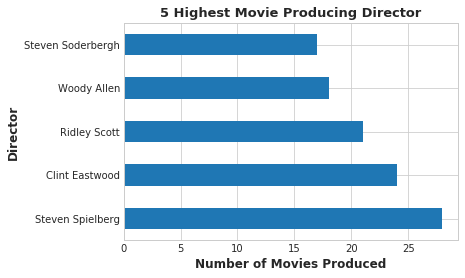

In [60]:
# Plotting the top 5 highest movie producing director
director_count[:5].plot(kind='barh',rot=0)

plt.title('5 Highest Movie Producing Director', fontsize = '13', fontweight = 'bold')
plt.xlabel('Number of Movies Produced', fontsize = '12', fontweight = 'bold')
plt.ylabel('Director', fontsize = '12', fontweight = 'bold')
plt.show();

>Steven Spielberg tops the list of directors producing the most number of movies. From 1960 to 2015, he produced 28 movies out of 1752. Client Eastwood came in at a close second with 24 movies underneath his belt. 

### Research Question 11 - What directors generated the highest revenues?

In [61]:
# Take each director row and split the multiple values into strings and keep the first value.
df['director_split'] = df.director.str.split('|').str[0]

In [62]:
# Determine revenues generated by director
dir_rev = df.groupby(['director_split']).sum().revenue

# Sorting to determine highest revenues per director
top_dir_rev = dir_rev.sort_values(ascending=False)

# Top 5 directors with the highest revenues
top_dir_rev[:5]

director_split
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
Name: revenue, dtype: int64

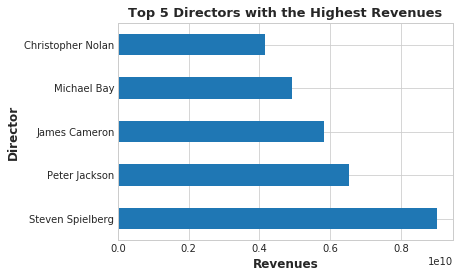

In [63]:
# Plotting the top 5 directors with the highest revenue
top_dir_rev[:5].plot(kind='barh',rot=0)

plt.title('Top 5 Directors with the Highest Revenues', fontsize = '13', fontweight = 'bold')
plt.xlabel('Revenues', fontsize = '12', fontweight = 'bold')
plt.ylabel('Director', fontsize = '12', fontweight = 'bold')
plt.show();

>Based on the results above, Steven Spielberg not only tops the list as producing the most movies but he also tops the list of directors generating the most revenues, 9 billion from 1960 to 2015. 

>Let's generate a list of movies he has produced over the years to see if we recognize any.

In [64]:
# Let's get a breakdown of the movies produced by Steven Spielberg
movies_spielberg = df[df.director_split == 'Steven Spielberg']
movies_spielberg.head(10)

,id,popularity,budget,revenue,variance,original_title,cast,director,runtime,genres,release_date,release_year,genres_split,director_split
33,296098,3.648210,40000000,162610473,122610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,141,Thriller|Drama,2015-10-15,2015,Thriller,Steven Spielberg
1334,840,1.104816,20000000,303788635,283788635,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,135,Science Fiction|Drama,1977-11-16,1977,Science Fiction,Steven Spielberg
2638,644,2.971372,100000000,235926552,135926552,A.I. Artificial Intelligence,Haley Joel Osment|Frances O'Connor|Sam Robards...,Steven Spielberg,146,Drama|Science Fiction|Adventure,2001-06-29,2001,Drama,Steven Spielberg
2879,217,3.161670,185000000,786636033,601636033,Indiana Jones and the Kingdom of the Crystal S...,Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray ...,Steven Spielberg,122,Adventure|Action,2008-05-21,2008,Adventure,Steven Spielberg
3397,17578,2.234300,130000000,371940071,241940071,The Adventures of Tintin,Jamie Bell|Andy Serkis|Daniel Craig|Nick Frost...,Steven Spielberg,107,Adventure|Animation|Action|Family|Mystery,2011-10-25,2011,Adventure,Steven Spielberg
3414,57212,1.592819,66000000,177584879,111584879,War Horse,Tom Hiddleston|Benedict Cumberbatch|Toby Kebbe...,Steven Spielberg,146,Drama|War,2011-12-25,2011,Drama,Steven Spielberg
3918,640,2.973115,52000000,352114312,300114312,Catch Me If You Can,Leonardo DiCaprio|Tom Hanks|Christopher Walken...,Steven Spielberg,141,Drama|Crime,2002-12-25,2002,Drama,Steven Spielberg
3921,180,2.103595,102000000,358372926,256372926,Minority Report,Tom Cruise|Colin Farrell|Samantha Morton|Max v...,Steven Spielberg,145,Action|Thriller|Science Fiction|Mystery,2002-06-20,2002,Action,Steven Spielberg
4425,72976,1.312488,65000000,275293450,210293450,Lincoln,Daniel Day-Lewis|Sally Field|David Strathairn|...,Steven Spielberg,149,Drama|War,2012-11-09,2012,Drama,Steven Spielberg
5387,11831,0.221360,36000000,74000000,38000000,Amistad,Morgan Freeman|Nigel Hawthorne|Anthony Hopkins...,Steven Spielberg,155,Drama|History|Mystery,1997-12-03,1997,Drama,Steven Spielberg


Wow, Steven Spielberg's movie list is impressive. He has produced movies in most of the top genres and has been very successful in each category. He definitly has the magic touch when it comes to creating movies that turn out to be blockbuster hits. Each movie has generated significant revenues. 

### Research Question 12 - Which movies had the highest popularity rankings?

>Let's analyze movie popularity rankings and see which movies had the highest rankings.

>Note: if you'd like to get a better understanding of what metrics go into the determining popularity ratings, click on link for more details [The Movie Database API](https://developers.themoviedb.org/3/getting-started/popularity) 

In [65]:
# Calculating movies with highest popularity rankings by calling on the get_top_yearly_records function
get_top_yearly_records('original_title', 'popularity')

original_title
Jurassic World             32.985763
Mad Max: Fury Road         28.419936
Interstellar               24.949134
Guardians of the Galaxy    14.311205
Insurgent                  13.112507
Name: popularity, dtype: float64

>Based on the popularity ratings above, just because a movie ranks high in the popularity rankings doesn't always guarantee top revenues. For example, Jurassic World ranked 1st for popularity but came in 5th for movies with highest revenues. 

### Research Question 13 - Which actors appeared in the most movies?

In [66]:
# Create a new variable to store our returned cast values and call on the split_data function
cast_count = split_data('cast').head()

# Display the top 5 cast with the highest movie counts
cast_count[:5]

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

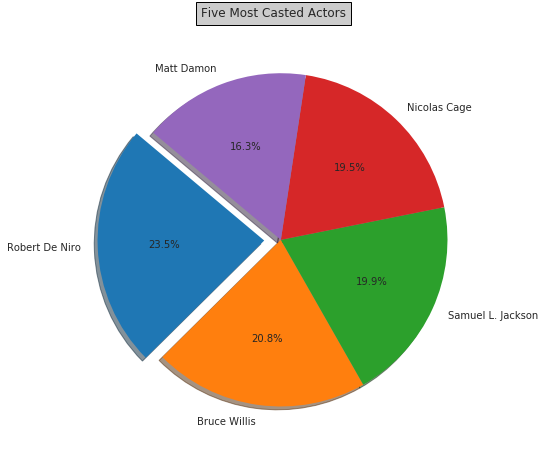

In [67]:
# Plot data
cast_percentage = cast_count
cast_name = ['Robert De Niro', 'Bruce Willis', 'Samuel L. Jackson', 'Nicolas Cage', 'Matt Damon']

plt.subplots(figsize=(7, 8))

# Colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Explode 1st slice
explode = (0.1, 0, 0, 0, 0)  

# Plot
plt.pie(cast_percentage, explode=explode, labels=cast_name, colors=colors,        
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Five Most Casted Actors", bbox={'facecolor':'0.8', 'pad':5})
plt.axis("equal")
plt.show();

>Based on the cast analysis above, Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage, and Matt Damon have appeared in the most movies from 1960 to 2015. Similar to popularity rankings, number of appearances in movies doesn't always guarantee the top revenues for the movies. For example, Rober De Niro appeared in 52 movies, but none of them were included in the list of top five revenue producing movies.

<a id='conclusions'></a>
## Conclusions

>My analysis of the movie data set shows there has been an upward revenue trend over the years from the period 1960 to 2015. But to really understand the revenue growth from year to year, you really need to look under the hood and see which parts could be contributing to this upward growth. For example, was there a correlation between the number of movies produced, budgets, genres types, directors, or cast members. 

>First, I looked at the total number of movies produced each year and noted that movie production increased significantly from five movies released in 1960 to 160 in 2015. Could this increase be driving up revenues since more movies equals more revenues? Next, I looked at the percentage growth of movie releases since 1960 and noted that the growth rate had sky rocketed all the way to 3,200 % in 2015. What is causing this huge growth rate? Why are movie releases increasing over the years? I did a little digging and my research points to technology advances in film production, allowing the filming industry to produce more movies at an increased rate. In addition, advances in equipment, cameras, visual effects, and audio  visual are enabling the production of higher resolution and better quality films. The introduction of digital has significantly reduced movie production costs. Shooting in digital allows producers to do more in less time at a much lower cost. In my opinion, all of these factors contribute to the ability to produce more movies each year, resulting in the potential for increased revenues and movie production each year due to the reduction is pre and post production costs.

>Second, I analyzed the relationship between revenues and budgets and noted there was a positive correlation for both variables. As budgets increased so did revenues but I noticed the gap between the two variables were significantly increasing from year to year. Was this due to the technology advances I mentioned above or could it be additional factors, such as genre, director, popularity, or cast members.

>Next, I reviewed the variances between revenues and budgets and concluded that 2015 had the largest variance (19 billion) compared to the other years. But if you look at variances by movie detail, you can see that the top five movies with the largest variances (Avatar, Star Wars, Titanic, Jurassic World, and Furious 7) all came from different release years. The top five movies with the largest variances were produced by some of the most well known and respected directors in the film industry. All having a history of generating blockbuster movies. I also noted that the movie cast included a large ensemble of famous actors. In my opinion, this could definitely influence revenue generation due their star power and huge fan base following. 

>I also analyzed genre categories. From the list of 19 different genre types, I narrowed down my analysis to the top 10 with the highest movie counts. My results, revealed Drama, Comedy, and Action counts as the most popular genres. Why do directors gravitate towards those particular genres? Is is correlated with their potentail revenue streams? Do they generate the highest revenue? Looking at total revenues per genre, the top 5 revenue producing genres were Action, Adventure, Comedy, and Drama with Action as the top revenue maker, totaling revenues of 94 billion. Based on my research, certain genres do seem to generate more revenues than others. 

>Next, I looked at the top five most successful movies (Avatar, Star Wars, Titanic, The Avengers, and Jurassic World) based on total revenues. All five were listed in either Action, Drama, or Science Fiction. Based on commonality traits, all of the successful movies had an all star ensemble and were produced by some of the most well known directors of our time, which included directors, such as James Cameron, J.J. Abrams, and Joss Whedon just to name a few. 

>Additionally, I reviewed popularity ratings and noted that just because a movie ranks high in the popularity ratings, it doesn't always guarantee top revenues. For example, Jurassic World ranked 1st for popularity but ranked 5th for highest revenues. 

>Lastly, I analyzed cast data. My results showed Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage, and Matt Damon appearing in the most movies from 1960 to 2015. Similar to popularity rankings, the number of appearances in movies doesn't always guarantee top revenues for movies. For example, Rober De Niro appeared in 52 movies, but none of them were included in the top five listing of revenue producing movies.

>Overall, this was a really fun data set to explore and analyze. There were so many ways to explore the data set. The possibilities are limitless.

>***Limitations***
> 
- Data quality issues related to missing values. Reviewing for zero values, the revenue and budget columns contained a significant amount of zeros, which accounted for over half of the rows in the dataset. 
- Because the genre column contained multiple variables it skewed the actual genre analysis. To account for this, I used the first variable as the primary genre for each movie. If I included all of the genre variables assigned to a movie, in my opinion, I felt that it would overshadow the primary genre and distort the ending results. 
- Even though there are metrics used to determine the popularity rating, there is no way to determine the consistency of the metrics applied to each movie. Because of this, I didn't place too much weight on the popularity ratings but still included in my analysis.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0